<a href="https://colab.research.google.com/github/CesarRodriguez19/EstadisticaVerano/blob/main/U_2_ESTUDIENS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df= pd.read_csv("https://raw.githubusercontent.com/CesarRodriguez19/EstadisticaVerano/refs/heads/main/StudentPerformanceFactors.csv")
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


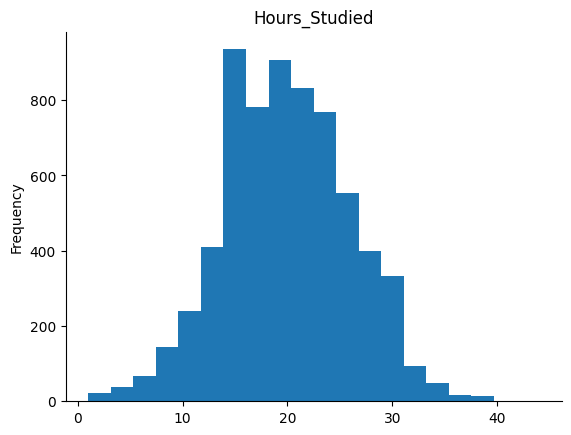

In [ ]:
# @title Hours_Studied

from matplotlib import pyplot as plt
df['Hours_Studied'].plot(kind='hist', bins=20, title='Hours_Studied')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
#Mi variable dependiante es =y= Exam_Score
#HOurs estudent: Noy hay datos atipicos es continia

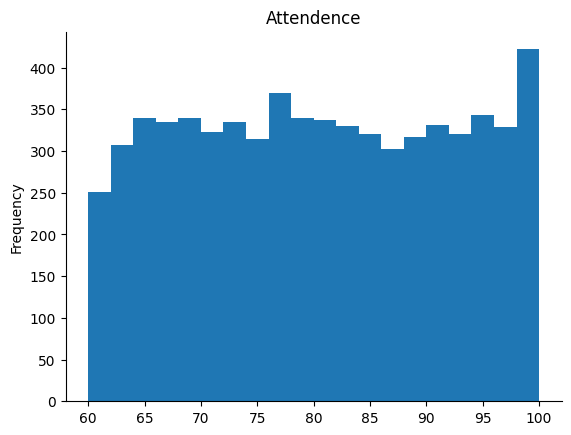

In [ ]:
## Attendence

from matplotlib import pyplot as plt
df['Attendance'].plot(kind='hist', bins=20, title='Attendence')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
#Mi variable dependiante es =y= Exam_Score
#HOurs estudent: Noy hay datos atipicos es continia
#Attencede: Noy hay datos atipicos es continia

## Atencion de los padres


In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

modelo_lineal = ols("Exam_Score ~ C(Parental_Involvement)", data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal)
tabla_anova


,df,sum_sq,mean_sq,F,PR(>F)
C(Parental_Involvement),2.0,2494.498775,1247.249388,84.487655,5.875479e-37
Residual,6604.0,97491.579929,14.762505,NaN,NaN


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
  High    Low  -1.7345   0.0 -2.0557 -1.4133   True
  High Medium  -0.9946   0.0 -1.2528 -0.7364   True
   Low Medium   0.7399   0.0  0.4487  1.0311   True
---------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

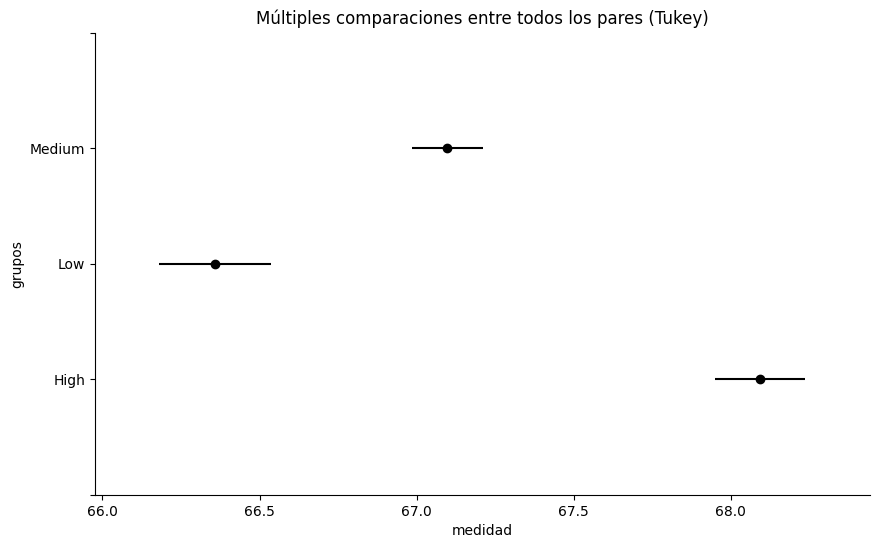

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['Exam_Score'], groups=df['Parental_Involvement'],
                          alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="grupos", xlabel="medidad")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

In [ ]:
df['Parental_Involvement']= df['Parental_Involvement'].map({"Low":0,"Medium":1,"High":2})
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,0,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,0,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,1,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,0,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,1,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,2,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,2,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,1,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,2,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


In [ ]:
#Mi variable dependiante es =y= Exam_Score
#HOurs estudent: Noy hay datos atipicos es continia
#Attencede: Noy hay datos atipicos es continia
#parebtal_involvement: si hubo diferencia significativa entre grupos.low 0,
#medioum 1,higt 2

In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

modelo_lineal = ols("Exam_Score ~ C(Access_to_Resources)", data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal)
tabla_anova


,df,sum_sq,mean_sq,F,PR(>F)
C(Access_to_Resources),2.0,2882.077605,1441.038802,98.004409,1.139299e-42
Residual,6604.0,97104.001100,14.703816,NaN,NaN


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
  High    Low  -1.8888   0.0 -2.2089 -1.5687   True
  High Medium  -0.9578   0.0 -1.2132 -0.7023   True
   Low Medium    0.931   0.0   0.638  1.2241   True
---------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

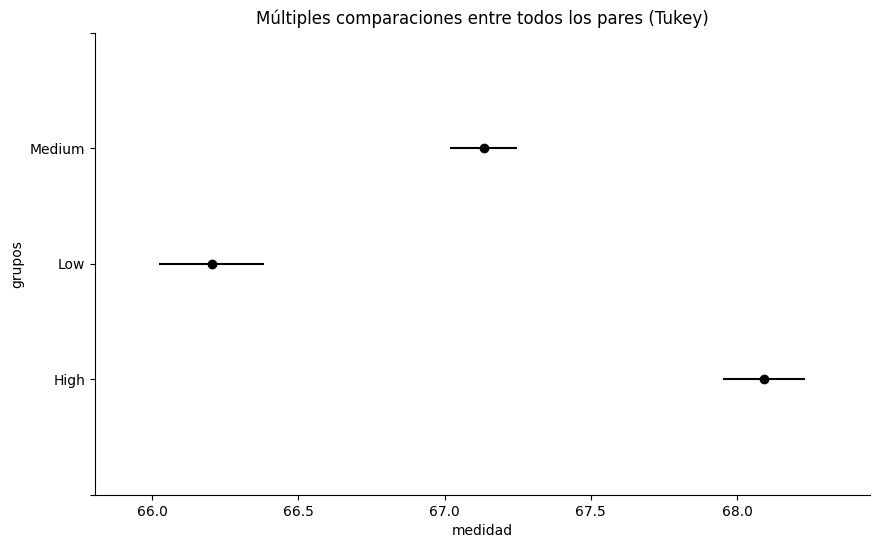

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['Exam_Score'], groups=df['Access_to_Resources'],
                          alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="grupos", xlabel="medidad")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

In [ ]:
df['Access_to_Resources']= df['Access_to_Resources'].map({"Low":0,"Medium":1,"High":2})
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,0,2,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,0,1,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,1,1,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,0,1,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,1,1,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,2,1,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,2,1,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,1,0,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,2,2,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


In [ ]:
#Mi variable dependiante es =y= Exam_Score
#HOurs estudent: Noy hay datos atipicos es continia
#Attencede: Noy hay datos atipicos es continia
#parebtal_involvement: si hubo diferencia significativa entre grupos.low 0,
#medioum 1,higt 2
#Acces_to_resources:si hubo diferencia significativa entre grupos.low 0,
#medioum 1,higt 2

## actividad extracurricurar


In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

modelo_lineal = ols("Exam_Score ~ C(Extracurricular_Activities)", data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal)
tabla_anova


,df,sum_sq,mean_sq,F,PR(>F)
C(Extracurricular_Activities),1.0,414.442759,414.442759,27.491709,1.626678e-07
Residual,6605.0,99571.635946,15.075191,NaN,NaN


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
    No    Yes   0.5104   0.0 0.3196 0.7012   True
-------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

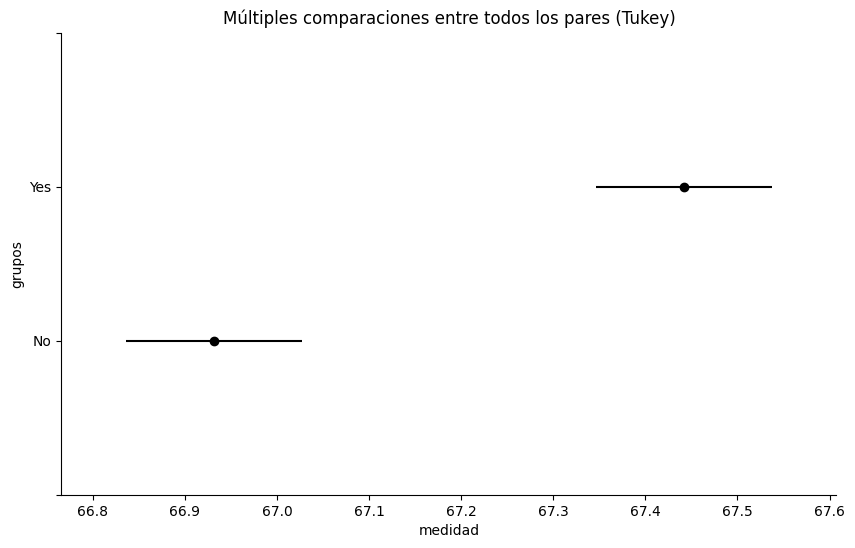

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['Exam_Score'], groups=df['Extracurricular_Activities'],
                          alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="grupos", xlabel="medidad")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

In [ ]:
df['Extracurricular_Activities']= df['Extracurricular_Activities'].map({"No":0,"Yes":1})
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,0,2,0,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,0,1,0,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,1,1,1,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,0,1,1,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,1,1,1,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,2,1,0,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,2,1,0,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,1,0,1,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,2,2,1,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


In [ ]:
#Mi variable dependiante es =y= Exam_Score
#HOurs estudent: Noy hay datos atipicos es continia
#Attencede: Noy hay datos atipicos es continia
#parebtal_involvement: si hubo diferencia significativa entre grupos.low 0,
#medioum 1,higt 2
#Acces_to_resources:si hubo diferencia significativa entre grupos.low 0,
#medioum 1,higt 2
#Extracurricular_Activities:si hubo diferencia significativa entre grupos.low 0,
#medioum 1,higt 2


##horas de sueño


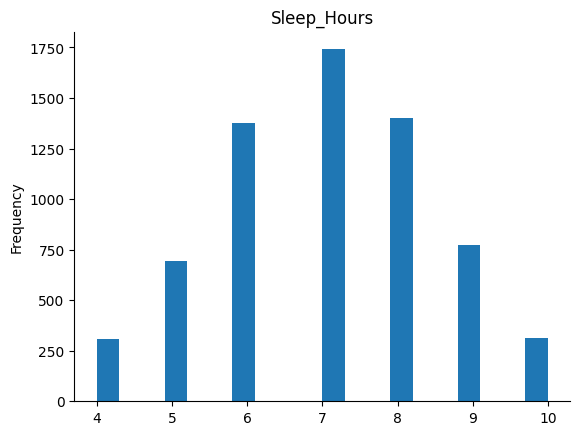

In [ ]:
from matplotlib import pyplot as plt
df['Sleep_Hours'].plot(kind='hist', bins=20, title='Sleep_Hours')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
#Mi variable dependiante es =y= Exam_Score
#HOurs estudent: Noy hay datos atipicos es continia
#Attencede: Noy hay datos atipicos es continia
#parebtal_involvement: si hubo diferencia significativa entre grupos.low 0,
#medioum 1,higt 2
#Acces_to_resources:si hubo diferencia significativa entre grupos.low 0,
#medioum 1,higt 2
#Extracurricular_Activities:si hubo diferencia significativa entre grupos.low 0,
#medioum 1,higt 2
#Sleep_Hours: variable numerica discreta no presenta datos atipicos


## calificaciones previas

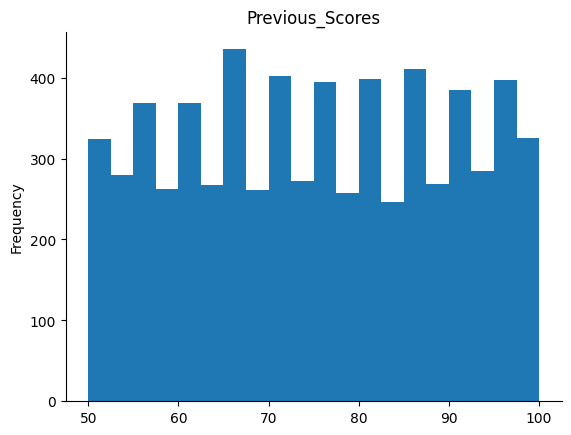

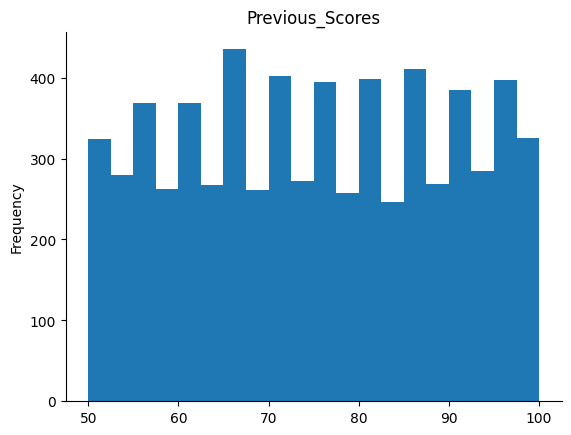

In [ ]:
from matplotlib import pyplot as plt
df['Previous_Scores'].plot(kind='hist', bins=20, title='Previous_Scores')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
#Mi variable dependiante es =y= Exam_Score

#HOurs estudent: Noy hay datos atipicos es continia

#Attencede: Noy hay datos atipicos es continia

#parebtal_involvement: si hubo diferencia significativa entre grupos.low 0,
#medioum 1,higt 2

#Acces_to_resources:si hubo diferencia significativa entre grupos.low 0,
#medioum 1,higt 2

#Extracurricular_Activities:si hubo diferencia significativa entre grupos.low 0,
#medioum 1,higt 2

#Sleep_Hours: variable numerica discreta no presenta datos atipicos
#y tiene forma de campana

#Previous_Scores:variable numerica discreta no presenta datos atipicos y tiene
#forma de campana

In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

modelo_lineal = ols("Exam_Score ~ C(Motivation_Level)", data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal)
tabla_anova

,df,sum_sq,mean_sq,F,PR(>F)
C(Previous_Scores),50.0,3714.826609,74.296532,5.059538,3.104737e-28
Residual,6556.0,96271.252095,14.684450,NaN,NaN
